## INTRO

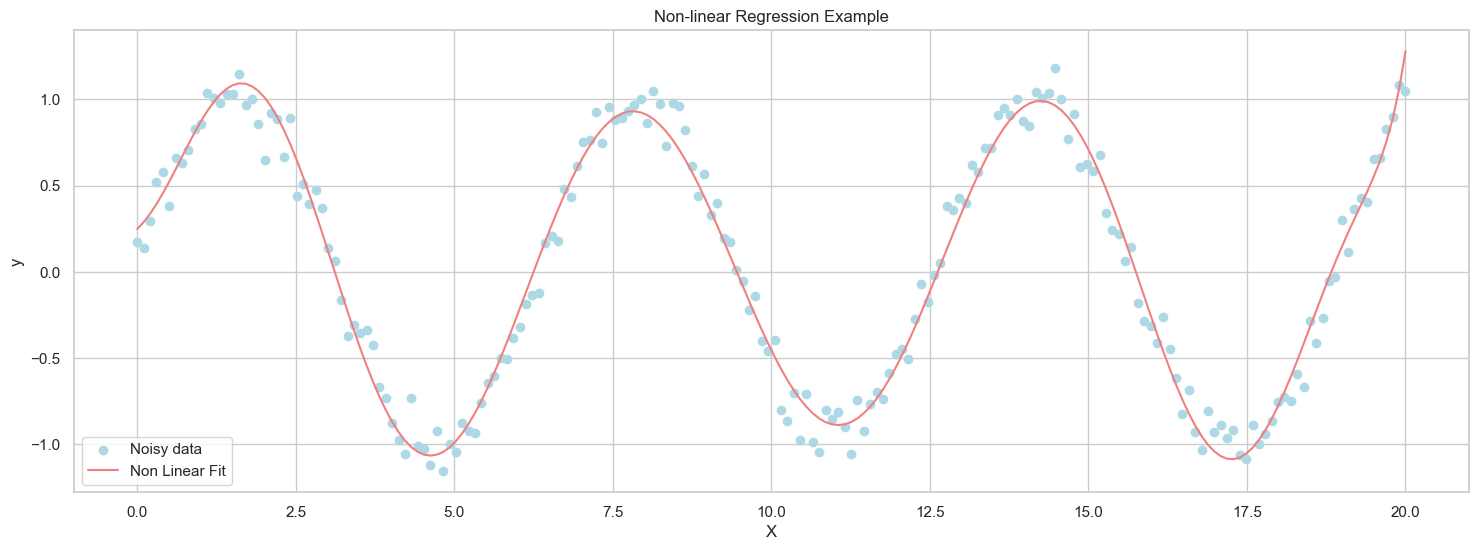

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Set seaborn style
sns.set(style="whitegrid")

# Generate synthetic non-linear dataset
np.random.seed(0)
X = np.linspace(0, 20, 200).reshape(-1, 1)  # Extended length of the wave
y = np.sin(X) + np.random.normal(0, 0.1, X.shape)

# Fit non-linear regression model using polynomial features
degree = 12
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Plot the results
plt.figure(figsize=(18, 6))
plt.scatter(X, y, color='lightblue', label='Noisy data')
plt.plot(X, y_pred, color='lightcoral', label=f'Non Linear Fit')
plt.title('Non-linear Regression Example')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.savefig('non_linear_regression_example.png')
plt.show()

## 2d plate

Converged after 2830 iterations


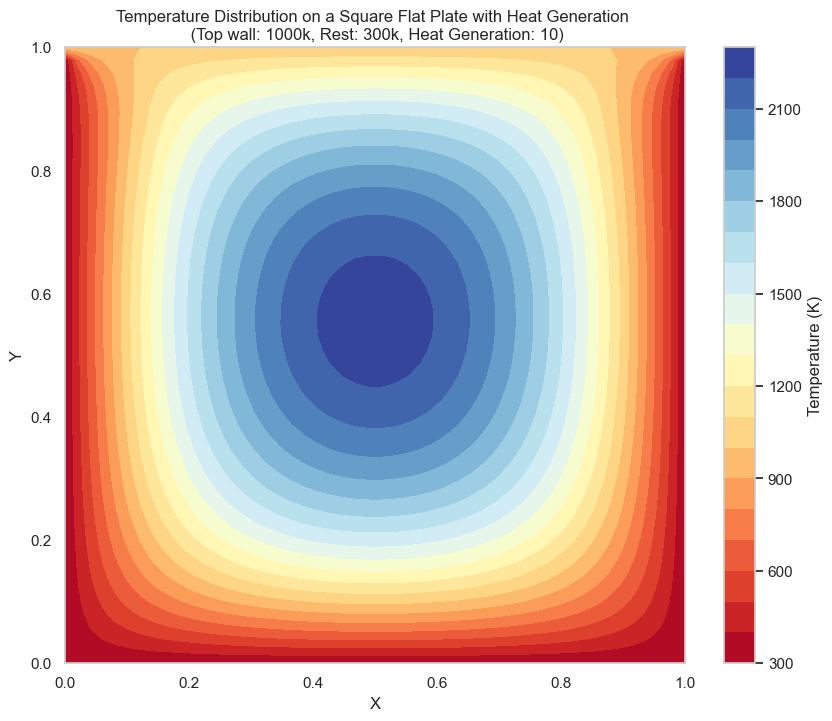

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Define the grid size and parameters
grid_size = 50
tolerance = 1e-4
max_iterations = 10000
heat_generation = 10  # Heat generation term

# Create a meshgrid
x = np.linspace(0, 1, grid_size)
y = np.linspace(0, 1, grid_size)
X, Y = np.meshgrid(x, y)

# Define wall temperatures
T_left = 300
T_right = 300
T_bottom = 300
T_top = 1000

# Initialize temperature field
T = np.zeros((grid_size, grid_size))

# Set boundary conditions
T[:, 0] = T_left
T[:, -1] = T_right
T[0, :] = T_bottom
T[-1, :] = T_top

# Gauss-Seidel method with second-order discretization and heat generation
for iteration in range(max_iterations):
    T_old = T.copy()
    for i in range(1, grid_size-1):
        for j in range(1, grid_size-1):
            T[i, j] = 0.25 * (T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1] + heat_generation)
    
    # Check for convergence
    if np.max(np.abs(T - T_old)) < tolerance:
        print(f'Converged after {iteration} iterations')
        break

# Plot the results
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, T, 20, cmap='RdYlBu')
cbar = plt.colorbar(contour)
cbar.set_label('Temperature (K)')


plt.title('Temperature Distribution on a Square Flat Plate with Heat Generation \n (Top wall: 1000k, Rest: 300k, Heat Generation: 10)')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('temperature_distribution_square_plate_heat_generation.png')
plt.show()

## GNA

Final value of a (Initial Excess Temperature): 46.78019258184879
Final value of b (Time Constant): 0.007325728725294577


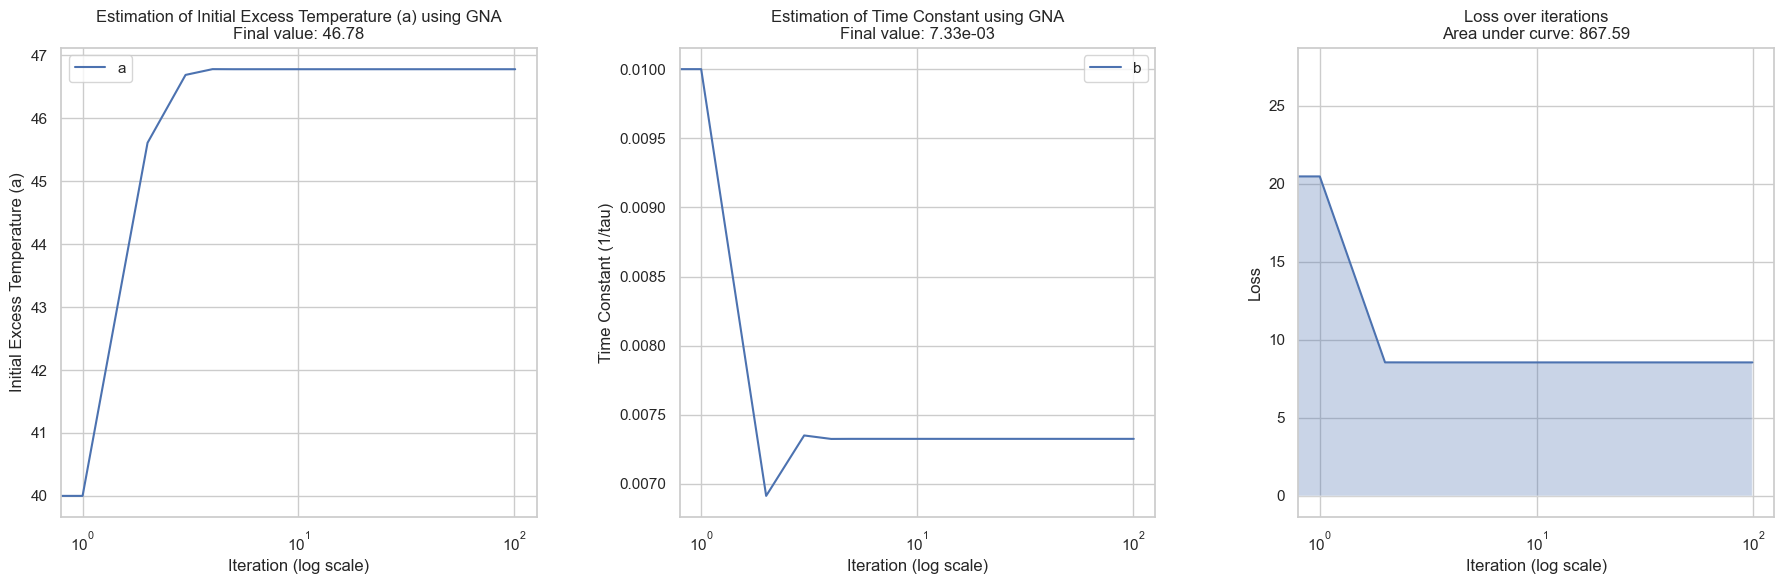

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn style
sns.set(style="whitegrid")

# Provided functions
def func(x, a, b):
    return a * (1 - np.exp(-b * x))

def del_a(x, a, b):
    return (1 - np.exp(-b * x))

def del_b(x, a, b):
    return a * (x * np.exp(-b * x))

def del_a_fd(x, a, b, h=1e-6):
    return (func(x, a + h, b) - func(x, a, b)) / h

def del_b_fd(x, a, b, h=1e-6):
    return (func(x, a, b + h) - func(x, a, b)) / h

# Generate synthetic data
np.random.seed(0)
x_data = np.array([11, 42, 80, 140, 203, 299])
y_data = np.array([3.7, 12.2, 21.3, 28.2, 38.3, 40.8])

# Initial guesses
a0 = 40
b0 = 1e-2

# GNA algorithm
def gna(x, y, a0, b0, max_iter=100, tol=1e-6):
    a, b = a0, b0
    params = [(a, b)]
    params.append((a, b))
    losses = []

    for _ in range(max_iter):
        y_pred = func(x, a, b)
        residuals = y - y_pred
        loss = np.sum(residuals**2)
        losses.append(loss)

        if loss < tol:
            break

        J = np.vstack([del_a(x, a, b), del_b(x, a, b)]).T
        H = J.T @ J
        g = J.T @ residuals

        delta = np.linalg.solve(H, g)
        a += delta[0]
        b += delta[1]

        params.append((a, b))

    return params, losses

# Run GNA
params, losses = gna(x_data, y_data, a0, b0)

# Extract parameter values
a_values, b_values = zip(*params)

# Calculate the area under the loss curve
area_under_loss = np.trapz(losses, dx=1)

# Get final values of a and b
final_a = a_values[-1]
final_b = b_values[-1]

# Print final values of a and b
print(f"Final value of a (Initial Excess Temperature): {final_a}")
print(f"Final value of b (Time Constant): {final_b}")

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot parameter changes for a
ax[0].plot(a_values, label='a')
ax[0].set_xlabel('Iteration (log scale)')
ax[0].set_ylabel('Initial Excess Temperature (a)')
ax[0].set_xscale('log')
ax[0].legend()
ax[0].set_title(f'Estimation of Initial Excess Temperature (a) using GNA\nFinal value: {final_a:.2f}')

# Plot parameter changes for b
ax[1].plot(b_values, label='b')
ax[1].set_xlabel('Iteration (log scale)')
ax[1].set_ylabel('Time Constant (1/tau)')
ax[1].set_xscale('log')
ax[1].legend()
ax[1].set_title(f'Estimation of Time Constant using GNA\nFinal value: {final_b:.2e}')

# Plot loss
ax[2].plot(losses, label='Loss')
ax[2].fill_between(range(len(losses)), losses, alpha=0.3)
ax[2].set_xlabel('Iteration (log scale)')
ax[2].set_ylabel('Loss')
ax[2].set_xscale('log')
ax[2].set_title(f'Loss over iterations\nArea under curve: {area_under_loss:.2f}')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust the width space between subplots

plt.savefig('gna_example.png')
plt.show()

## MA

Final value of a (Initial Excess Temperature): 46.780192581845554
Final value of b (Time Constant): 0.007325728725295568


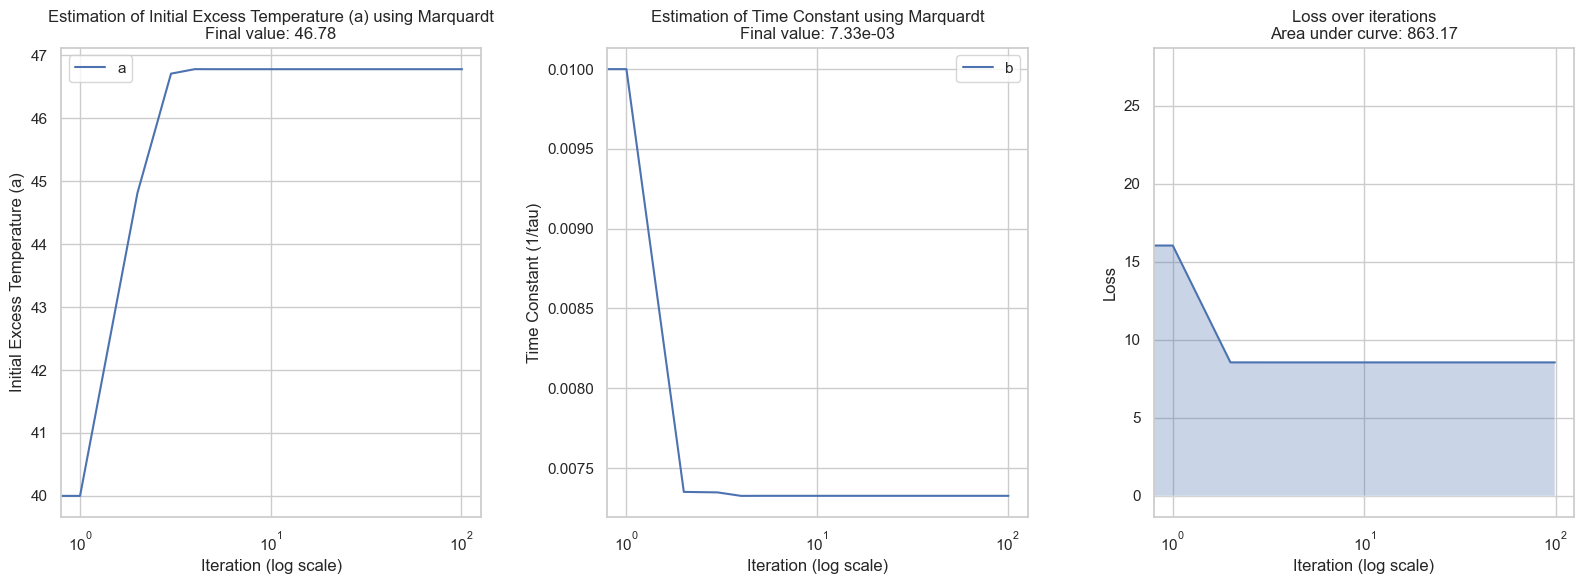

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Provided functions
def func(x, a, b):
    return a * (1 - np.exp(-b * x))

def del_a(x, a, b):
    return (1 - np.exp(-b * x))

def del_b(x, a, b):
    return a * (x * np.exp(-b * x))

def del_a_fd(x, a, b, h=1e-6):
    return (func(x, a + h, b) - func(x, a, b)) / h

def del_b_fd(x, a, b, h=1e-6):
    return (func(x, a, b + h) - func(x, a, b)) / h

# Generate synthetic data
np.random.seed(0)
x_data = np.array([11, 42, 80, 140, 203, 299])
y_data = np.array([3.7, 12.2, 21.3, 28.2, 38.3, 40.8])

# Initial guesses
a0 = 40
b0 = 1e-2

# Marquardt Algorithm
def marquardt(x, y, a0, b0, max_iter=100, tol=1e-6, lambda_init=1e-1):
    a, b = a0, b0
    params = [(a, b)]
    params.append((a, b))
    losses = []
    lambda_ = lambda_init

    for _ in range(max_iter):
        y_pred = func(x, a, b)
        residuals = y - y_pred
        loss = np.sum(residuals**2)
        losses.append(loss)

        if loss < tol:
            break

        J = np.vstack([del_a(x, a, b), del_b(x, a, b)]).T
        H = J.T @ J
        g = J.T @ residuals

        # Adjust H with lambda
        H_lm = H + lambda_ * np.eye(H.shape[0])

        try:
            delta = np.linalg.solve(H_lm, g)
        except np.linalg.LinAlgError:
            break

        a_new = a + delta[0]
        b_new = b + delta[1]

        # Calculate new loss
        y_pred_new = func(x, a_new, b_new)
        residuals_new = y - y_pred_new
        loss_new = np.sum(residuals_new**2)

        if loss_new < loss:
            a, b = a_new, b_new
            lambda_ /= 10
        else:
            lambda_ *= 10

        params.append((a, b))

    return params, losses

# Run Marquardt Algorithm
params, losses = marquardt(x_data, y_data, a0, b0)

# Extract parameter values
a_values, b_values = zip(*params)

# Calculate the area under the loss curve
area_under_loss = np.trapz(losses, dx=1)

# Get final values of a and b
final_a = a_values[-1]
final_b = b_values[-1]

# Print final values of a and b
print(f"Final value of a (Initial Excess Temperature): {final_a}")
print(f"Final value of b (Time Constant): {final_b}")

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(16, 6))

# Plot parameter changes for a
ax[0].plot(a_values, label='a')
ax[0].set_xlabel('Iteration (log scale)')
ax[0].set_ylabel('Initial Excess Temperature (a)')
ax[0].set_xscale('log')
ax[0].legend()
ax[0].set_title(f'Estimation of Initial Excess Temperature (a) using Marquardt\nFinal value: {final_a:.2f}')

# Plot parameter changes for b
ax[1].plot(b_values, label='b')
ax[1].set_xlabel('Iteration (log scale)')
ax[1].set_ylabel('Time Constant (1/tau)')
ax[1].set_xscale('log')
ax[1].legend()
ax[1].set_title(f'Estimation of Time Constant using Marquardt\nFinal value: {final_b:.2e}')

# Plot loss
ax[2].plot(losses, label='Loss')
ax[2].fill_between(range(len(losses)), losses, alpha=0.3)
ax[2].set_xlabel('Iteration (log scale)')
ax[2].set_ylabel('Loss')
ax[2].set_xscale('log')
ax[2].set_title(f'Loss over iterations\nArea under curve: {area_under_loss:.2f}')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust the width space between subplots

plt.savefig('marquardt_example.png')
plt.show()

## LMA

Final value of a (Initial Excess Temperature): 46.78019243503227
Final value of b (Time Constant): 0.007325728776867221


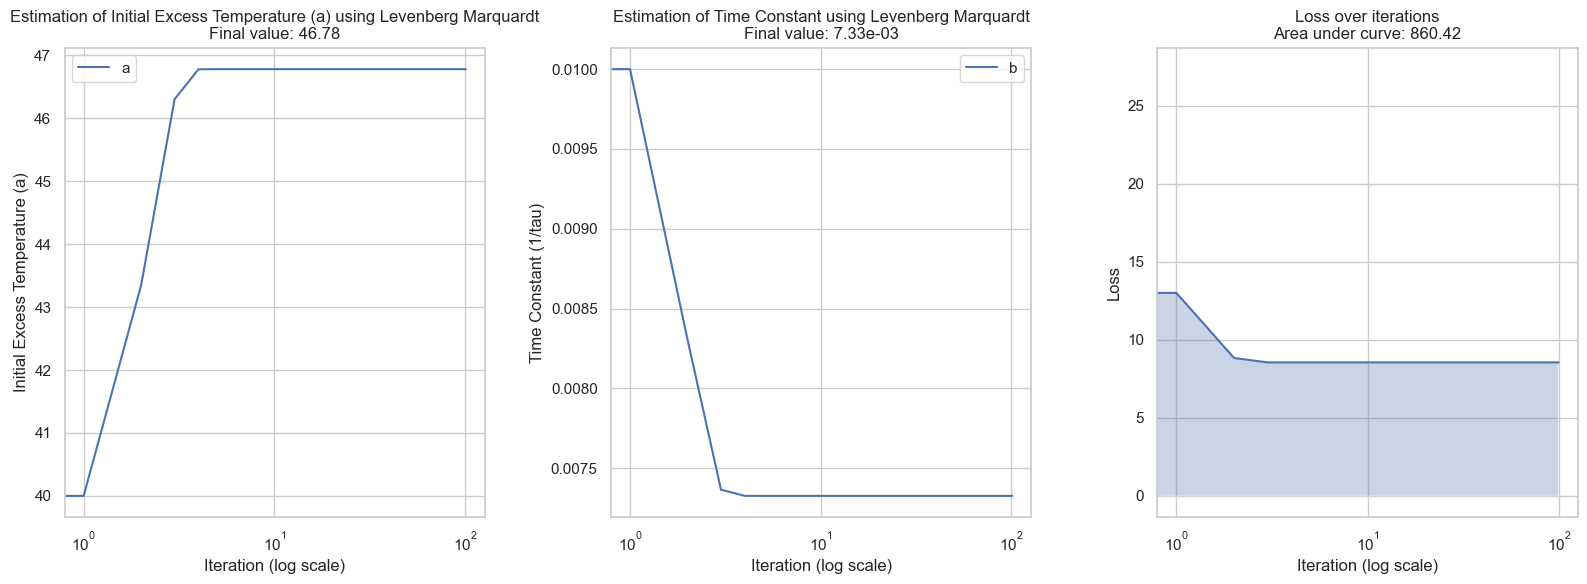

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Provided functions
def func(x, a, b):
    return a * (1 - np.exp(-b * x))

def del_a(x, a, b):
    return (1 - np.exp(-b * x))

def del_b(x, a, b):
    return a * (x * np.exp(-b * x))

def del_a_fd(x, a, b, h=1e-6):
    return (func(x, a + h, b) - func(x, a, b)) / h

def del_b_fd(x, a, b, h=1e-6):
    return (func(x, a, b + h) - func(x, a, b)) / h

# Generate synthetic data
np.random.seed(0)
x_data = np.array([11, 42, 80, 140, 203, 299])
y_data = np.array([3.7, 12.2, 21.3, 28.2, 38.3, 40.8])

# Initial guesses
a0 = 40
b0 = 1e-2

# Marquardt Algorithm
def lma(x, y, a0, b0, max_iter=100, tol=1e-6, lambda_init=0.09):
    a, b = a0, b0
    params = [(a, b)]
    params.append((a, b))
    losses = []
    lambda_ = lambda_init

    for _ in range(max_iter):
        y_pred = func(x, a, b)
        residuals = y - y_pred
        loss = np.sum(residuals**2)
        losses.append(loss)

        if loss < tol:
            break

        J = np.vstack([del_a(x, a, b), del_b(x, a, b)]).T
        H = J.T @ J
        g = J.T @ residuals

        # Adjust H with lambda
        H_lm = H + lambda_ * np.diag(np.diag(H))    # Only diagonal elements

        try:
            delta = np.linalg.solve(H_lm, g)
        except np.linalg.LinAlgError:
            break

        a_new = a + delta[0]
        b_new = b + delta[1]

        # Calculate new loss
        y_pred_new = func(x, a_new, b_new)
        residuals_new = y - y_pred_new
        loss_new = np.sum(residuals_new**2)

        if loss_new < loss:
            a, b = a_new, b_new
            lambda_ /= 10
        else:
            lambda_ *= 10

        params.append((a, b))

    return params, losses

# Run Marquardt Algorithm
params, losses = lma(x_data, y_data, a0, b0)

# Extract parameter values
a_values, b_values = zip(*params)

# Calculate the area under the loss curve
area_under_loss = np.trapz(losses, dx=1)

# Get final values of a and b
final_a = a_values[-1]
final_b = b_values[-1]

# Print final values of a and b
print(f"Final value of a (Initial Excess Temperature): {final_a}")
print(f"Final value of b (Time Constant): {final_b}")

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(16, 6))

# Plot parameter changes for a
ax[0].plot(a_values, label='a')
ax[0].set_xlabel('Iteration (log scale)')
ax[0].set_ylabel('Initial Excess Temperature (a)')
ax[0].set_xscale('log')
ax[0].legend()
ax[0].set_title(f'Estimation of Initial Excess Temperature (a) using Levenberg Marquardt\nFinal value: {final_a:.2f}')

# Plot parameter changes for b
ax[1].plot(b_values, label='b')
ax[1].set_xlabel('Iteration (log scale)')
ax[1].set_ylabel('Time Constant (1/tau)')
ax[1].set_xscale('log')
ax[1].legend()
ax[1].set_title(f'Estimation of Time Constant using Levenberg Marquardt\nFinal value: {final_b:.2e}')

# Plot loss
ax[2].plot(losses, label='Loss')
ax[2].fill_between(range(len(losses)), losses, alpha=0.3)
ax[2].set_xlabel('Iteration (log scale)')
ax[2].set_ylabel('Loss')
ax[2].set_xscale('log')
ax[2].set_title(f'Loss over iterations\nArea under curve: {area_under_loss:.2f}')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust the width space between subplots

plt.savefig('levenberg_marquardt_example.png')
plt.show()

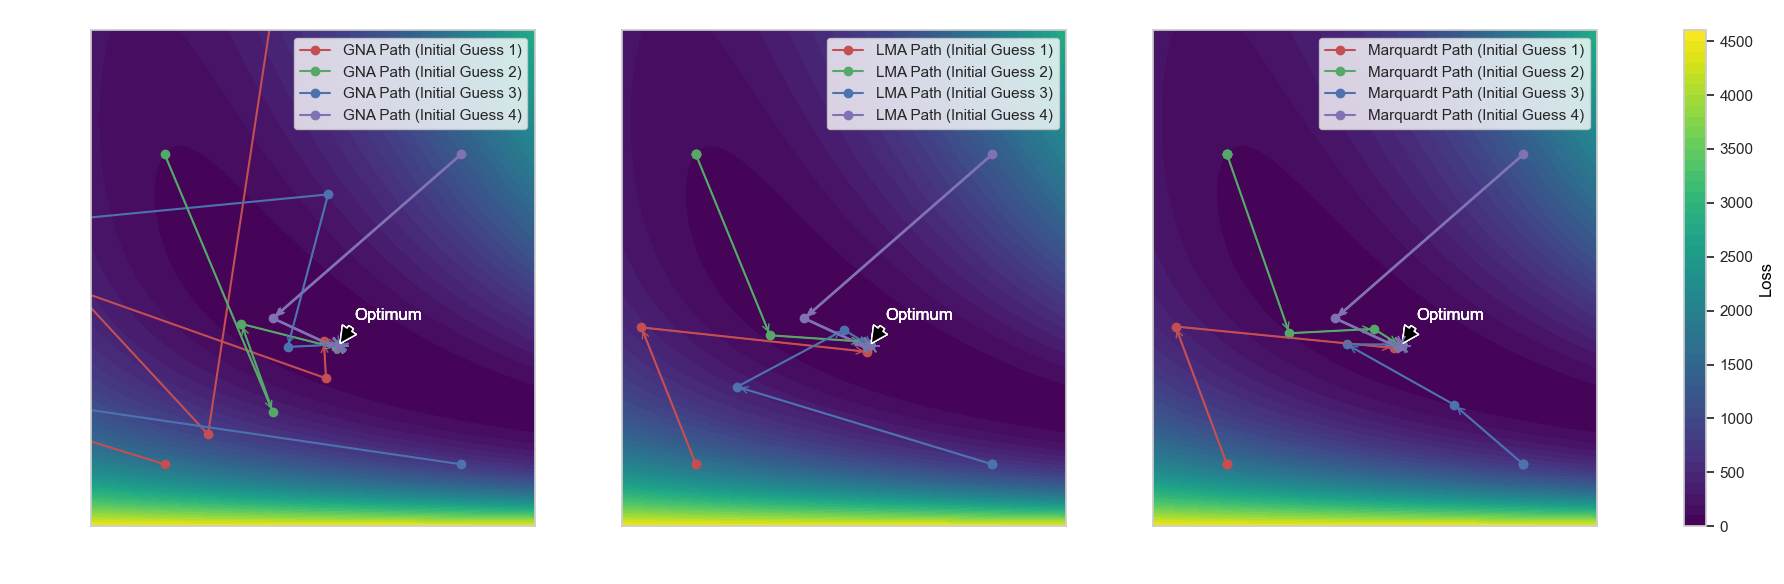

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Apply seaborn style
sns.set(style="whitegrid")

# Provided functions
def func(x, a, b):
    return a * (1 - np.exp(-b * x))

def del_a(x, a, b):
    return (1 - np.exp(-b * x))

def del_b(x, a, b):
    return a * (x * np.exp(-b * x))

# Generate synthetic data
np.random.seed(0)
x_data = np.array([11, 42, 80, 140, 203, 299])
y_data = np.array([3.7, 12.2, 21.3, 28.2, 38.3, 40.8])

# Adjusted initial guesses within bounds
initial_guesses = [(35, 0.0025), (35, 0.015), (55, 0.0025), (55, 0.015)]

# Loss function
def loss(a, b, x, y):
    y_pred = func(x, a, b)
    return np.sum((y - y_pred) ** 2)

# Gauss-Newton Algorithm (GNA)
def gna(x, y, a0, b0, max_iter=100, tol=1e-6):
    a, b = a0, b0
    params = [(a, b)]
    losses = []

    for _ in range(max_iter):
        y_pred = func(x, a, b)
        residuals = y - y_pred
        loss_value = np.sum(residuals**2)
        losses.append(loss_value)

        if loss_value < tol:
            break

        J = np.vstack([del_a(x, a, b), del_b(x, a, b)]).T
        H = J.T @ J
        g = J.T @ residuals

        delta = np.linalg.solve(H, g)
        a += delta[0]
        b += delta[1]

        params.append((a, b))

    return params, losses

# Levenberg-Marquardt Algorithm (LMA)
def lma(x, y, a0, b0, max_iter=100, tol=1e-6, lambda_init=1e-3):
    a, b = a0, b0
    params = [(a, b)]
    losses = []
    lambda_ = lambda_init

    for _ in range(max_iter):
        y_pred = func(x, a, b)
        residuals = y - y_pred
        loss_value = np.sum(residuals**2)
        losses.append(loss_value)

        if loss_value < tol:
            break

        J = np.vstack([del_a(x, a, b), del_b(x, a, b)]).T
        H = J.T @ J
        g = J.T @ residuals

        # Adjust H with lambda
        H_lm = H + lambda_ * np.diag(np.diag(H))    

        try:
            delta = np.linalg.solve(H_lm, g)
        except np.linalg.LinAlgError:
            break

        a_new = a + delta[0]
        b_new = b + delta[1]

        # Calculate new loss
        y_pred_new = func(x, a_new, b_new)
        residuals_new = y - y_pred_new
        loss_new = np.sum(residuals_new**2)

        if loss_new < loss_value:
            a, b = a_new, b_new
            lambda_ /= 10
        else:
            lambda_ *= 10

        params.append((a, b))

    return params, losses

# Marquardt Algorithm (MA)
def marquardt(x, y, a0, b0, max_iter=100, tol=1e-6, lambda_init=1e-3):
    a, b = a0, b0
    params = [(a, b)]
    losses = []
    lambda_ = lambda_init

    for _ in range(max_iter):
        y_pred = func(x, a, b)
        residuals = y - y_pred
        loss_value = np.sum(residuals**2)
        losses.append(loss_value)

        if loss_value < tol:
            break

        J = np.vstack([del_a(x, a, b), del_b(x, a, b)]).T
        H = J.T @ J
        g = J.T @ residuals

        # Adjust H with lambda
        H_lm = H + lambda_ * np.eye(H.shape[0])

        try:
            delta = np.linalg.solve(H_lm, g)
        except np.linalg.LinAlgError:
            break

        a_new = a + delta[0]
        b_new = b + delta[1]

        # Calculate new loss
        y_pred_new = func(x, a_new, b_new)
        residuals_new = y - y_pred_new
        loss_new = np.sum(residuals_new**2)

        if loss_new < loss_value:
            a, b = a_new, b_new
            lambda_ /= 10
        else:
            lambda_ *= 10

        params.append((a, b))

    return params, losses

# Create contour plots and paths for each algorithm
a_range = np.linspace(30, 60, 200)
b_range = np.linspace(0, 0.02, 200)
A, B = np.meshgrid(a_range, b_range)
Z = np.array([[loss(a, b, x_data, y_data) for a, b in zip(row_a, row_b)] for row_a, row_b in zip(A, B)])

# Create a gridspec layout
fig = plt.figure(figsize=(18, 6))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])

# Create subplots
axes = [fig.add_subplot(gs[i]) for i in range(3)]

colors = ['r', 'g', 'b', 'm']
labels = ['Initial Guess 1', 'Initial Guess 2', 'Initial Guess 3', 'Initial Guess 4']

for i, (a0, b0) in enumerate(initial_guesses):
    # Run algorithms
    gna_params, gna_losses = gna(x_data, y_data, a0, b0)
    lma_params, lma_losses = lma(x_data, y_data, a0, b0)
    marquardt_params, marquardt_losses = marquardt(x_data, y_data, a0, b0)

    # Extract parameter values
    gna_a_values, gna_b_values = zip(*gna_params)
    lma_a_values, lma_b_values = zip(*lma_params)
    marquardt_a_values, marquardt_b_values = zip(*marquardt_params)

    # Plot contour and paths
    for ax, algo_a_values, algo_b_values, algo_name in zip(axes, 
                                                          [gna_a_values, lma_a_values, marquardt_a_values], 
                                                          [gna_b_values, lma_b_values, marquardt_b_values], 
                                                          ['GNA', 'LMA', 'Marquardt']):
        contour = ax.contourf(A, B, Z, levels=50, cmap='viridis')
        ax.plot(algo_a_values, algo_b_values, marker='o', color=colors[i], label=f'{algo_name} Path ({labels[i]})')
        ax.quiver(algo_a_values[:-1], algo_b_values[:-1], 
                  np.diff(algo_a_values), np.diff(algo_b_values), 
                  scale_units='xy', angles='xy', scale=1, color=colors[i])
        ax.set_title(f'{algo_name} Paths', color='white')
        ax.set_xlabel('a', color='white')
        
        # Conditionally set the y-axis label
        if ax == axes[0]:
            ax.set_ylabel('b', color='white')
        
        ax.set_xlim(30, 60)
        ax.set_ylim(0, 0.02)
        ax.legend()

        # Highlight the optimum with an arrow
        ax.annotate('Optimum', xy=(algo_a_values[-1], algo_b_values[-1]), 
                    xytext=(algo_a_values[-1] + 1, algo_b_values[-1] + 0.001),
                    arrowprops=dict(facecolor='black', shrink=0.05), color='white')

        # Add arrows along the path
        for j in range(len(algo_a_values) - 1):
            if 30 <= algo_a_values[j] <= 60 and 0 <= algo_b_values[j] <= 0.02:
                ax.annotate('', xy=(algo_a_values[j + 1], algo_b_values[j + 1]), 
                            xytext=(algo_a_values[j], algo_b_values[j]),
                            arrowprops=dict(arrowstyle='->', color=colors[i]))

# Set the tick parameters to white for the first plot and hide for others
for ax in axes:
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white' if ax == axes[0] else 'none')

# Add colorbar with caption 'Loss'
cbar_ax = fig.add_subplot(gs[3])
cbar = fig.colorbar(contour, cax=cbar_ax, orientation='vertical')
cbar.set_label('Loss', color='black')

plt.tight_layout()
plt.savefig('algorithm_paths.png')
plt.show()

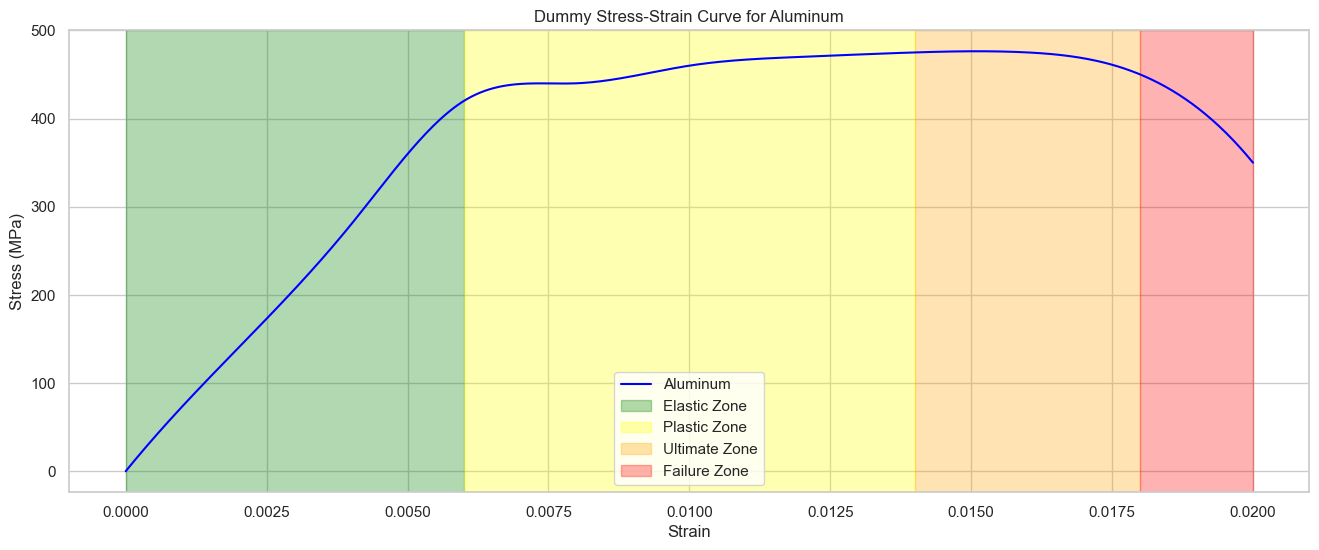

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import seaborn as sns

# Apply seaborn style
sns.set(style="whitegrid")

# Define more detailed stress-strain data points for aluminum
strain_points = [0, 0.002, 0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02]
stress_points = [0, 140, 280, 420, 440, 460, 470, 475, 475, 450, 350]  # Adjusted values for a flatter ultimate zone

# Generate smooth curve using spline interpolation
strain_smooth = np.linspace(0, 0.02, 500)
spline = make_interp_spline(strain_points, stress_points, k=3)
stress_smooth = spline(strain_smooth)

# Create the plot
plt.figure(figsize=(16, 6))
plt.plot(strain_smooth, stress_smooth, color='blue', label='Aluminum')

# Highlight zones
plt.axvspan(0, 0.006, color='green', alpha=0.3, label='Elastic Zone')
plt.axvspan(0.006, 0.014, color='yellow', alpha=0.3, label='Plastic Zone')
plt.axvspan(0.014, 0.018, color='orange', alpha=0.3, label='Ultimate Zone')
plt.axvspan(0.018, 0.02, color='red', alpha=0.3, label='Failure Zone')

# Add labels and title
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')
plt.title('Dummy Stress-Strain Curve for Aluminum')
plt.legend()

# Display the plot
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('stress_strain_curve.png')
plt.show()